In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import pickle

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open("ccdf3.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [3]:
with open("ccdf_upsampled_train.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [4]:
with open("ccdf_upsampled_test.pkl", 'rb') as picklefile: 
    ccdf_up_test = pickle.load(picklefile)
    
    
X_up_final_test = ccdf_up_test.drop('default',1)
y_up_final_test = ccdf_up_test.default

In [5]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [6]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [8]:
X = ccdf.drop('default',1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up, y_up, test_size=0.4, random_state=42)

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.4, random_state=42)

In [21]:
#Decision tree classifier
log = LogisticRegression(tol = .00000000001)
fit = log.fit(X_train, y_train)
yhat = fit.predict(X_test)
log_score = fit.score(X_test, y_test)
print(log_score)

0.809874849991


Training Data Accuracy: 0.81
Test Data Accuracy:     0.81
[[6619  244]
 [1390  496]]


Precision:              0.83
Recall:                 0.96


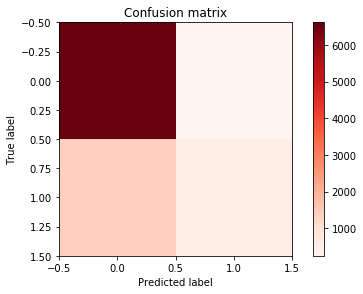

In [22]:
train_score(log,X,y)

Text(0,0.5,'TPR')

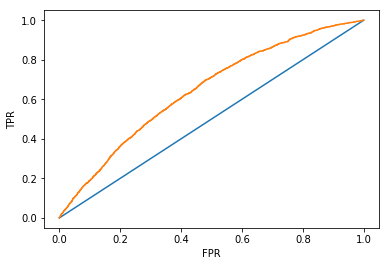

In [31]:
# What about ROC ? 
y_score=log.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [32]:
#Decision tree classifier
log = LogisticRegression()
fit = log.fit(X_up_train, y_up_train)
yhat = fit.predict(X_up_test)
log_up_score = fit.score(X_up_test, y_up_test)
print(log_up_score)

0.623767859121


Training Data Accuracy: 0.61
Test Data Accuracy:     0.61
[[1714 1665]
 [ 984 2409]]


Precision:              0.64
Recall:                 0.51


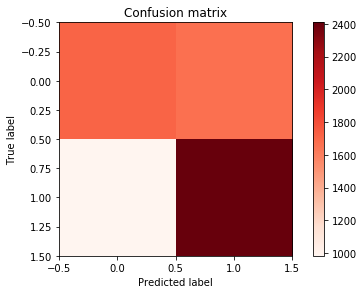

In [33]:
train_score(log,X_up,y_up)

Text(0,0.5,'TPR')

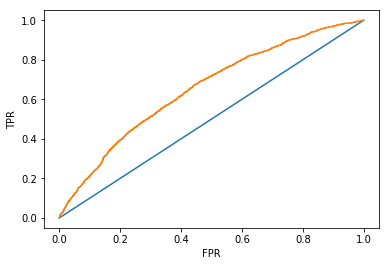

In [34]:
# What about ROC ? 
y_up_score=log.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [35]:
roc_auc

0.65339903945331002

Text(0,0.5,'TPR')

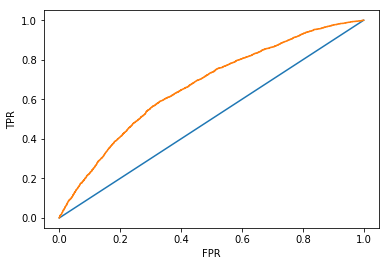

In [36]:
# What about ROC ? 
y_up_final_score=log.predict_proba(X_up_final_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_final_test, y_up_final_score)
roc_final_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [37]:
roc_final_auc

0.6673922084264019

In [40]:
print(classification_report(y_up_final_test, log.predict(X_up_final_test)))

             precision    recall  f1-score   support

          0       0.65      0.50      0.57     11363
          1       0.60      0.73      0.66     11363

avg / total       0.63      0.62      0.61     22726



In [16]:
#Decision tree classifier
log = LogisticRegression()
fit = log.fit(X_down_train, y_down_train)
yhat = fit.predict(X_down_test)
log_down_score = fit.score(X_down_test, y_down_test)
print(log_down_score)

0.58576362241


Training Data Accuracy: 0.59
Test Data Accuracy:     0.59
[[1024  928]
 [ 693 1264]]


Precision:              0.60
Recall:                 0.52


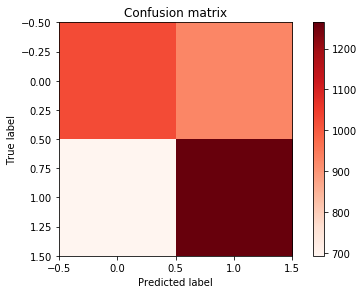

In [17]:
train_score(log,X_down,y_down)

Text(0,0.5,'TPR')

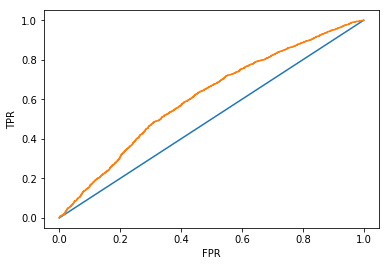

In [18]:
# What about ROC ? 
y_down_score=log.predict_proba(X_down_test)[:,1]

fpr_down, tpr_down,_ = roc_curve(y_down_test, y_down_score)
roc_auc = auc(fpr_down, tpr_down)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_down,tpr_down)
plt.xlabel('FPR')
plt.ylabel('TPR')

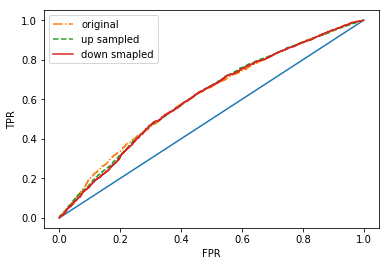

In [19]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'original', linestyle = '-.')
plt.plot(fpr_up,tpr_up, label = 'up sampled', linestyle = '--')
plt.plot(fpr_down,tpr_down, label = 'down smapled')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();